In [35]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact

# Import Data

In [4]:
# import total cleaned data
data_path = Path("clean_data/all_msa_clean_data.csv")
data = pd.read_csv(data_path)
data.drop(columns=["Unnamed: 0","GeoFips"],inplace=True)
data["Date"] = pd.to_datetime(data["Year"],format="%Y")
data.drop(columns=["Year"],inplace=True)
data.head()

,MSA,Population,Personal Income,Number Jobs,HPI,Date
0,"Baltimore-Columbia-Towson, MD",2557958,88618199,1543762,97.520000,2000-01-01
1,"Baltimore-Columbia-Towson, MD",2575471,92560218,1547690,105.058333,2001-01-01
2,"Baltimore-Columbia-Towson, MD",2596501,96206347,1558796,116.961667,2002-01-01
3,"Baltimore-Columbia-Towson, MD",2614232,100100963,1566963,134.725833,2003-01-01
4,"Baltimore-Columbia-Towson, MD",2630946,106048601,1593882,158.941667,2004-01-01


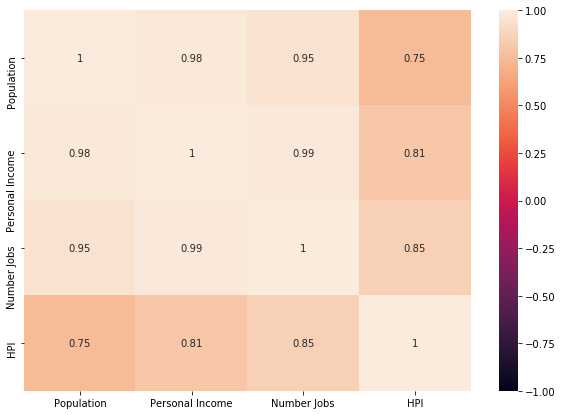

In [46]:
# create heatmap and save image
total = data.set_index("Date").sum(level="Date")
plt.figure(figsize=(10,7))
heatmap = sns.heatmap(total.corr(),vmin=-1,vmax=1,annot=True)
heatmap.figure.savefig("images/heatmap.png")

# Create Visualizations
Creating functions to input into the final dashboard

In [ ]:
# Define Panel Visualization Functions - Overview

In [ ]:
# Define Panel Visualization Functions - Historical

In [49]:
# Define Panel Visualization Functions - Correlations

def total_correlation():
    """Total Correlation between Variables"""
    
    heatmap = pn.panel("images/heatmap.png")

    
    return heatmap

def hpi_vs_population():
    """Correlation between HPI and Population - grouped by MSA"""
    
    population = data[["Date","MSA","Population","HPI"]]
    plot = population.hvplot.scatter(x="HPI",y="Population",groupby="MSA", title="Correlation between HPI and Population", width=1000, height=400)
    
    return plot

def hpi_vs_income():
    """Correlation between HPI and Personal Income - grouped by MSA"""
    
    income = data[["Date","MSA","Personal Income","HPI"]]
    plot = income.hvplot.scatter(x="HPI",y="Personal Income",groupby="MSA", title="Correlation between HPI and Personal Income", width=1000, height=400)
    
    return plot

def hpi_vs_employment():
    """Correlation between HPI and Employment - grouped by MSA"""
    
    employment = data[["Date","MSA","Number Jobs","HPI"]]
    plot = employment.hvplot.scatter(x="HPI",y="Number Jobs",groupby="MSA", title="Correlation between HPI and Employment", width=1000, height=400)
    
    return plot

In [ ]:
# Define Panel Visualization Functions - Forecasts

In [ ]:
# Define Panel Visualization Functions - Conclusion

# Panel Dashboard
Inputting the functions into the final dashboard

In [62]:
# Create opening lines for the dashboard
title = "# Top 20 Metropolitan Statistical Area Housing Price Analysis"
subtitle = "### An analysis of Housing Price Index in the major metropolitan areas of the United States"
team = "<b>Team</b>: Alex Beckham, Jacob Jalomo, Joshua Bond"

# Create text to be included in tabs

# Text - Overview

# Text - Historical

# Text - Correlations
title_corr = "### Correlating Housing Price Index, Population, Personal Income, and Employment"
subtitle_corr = "Determining whether Population, Personal Income, and Employment have a high correlation with Housing Price Index.<br>High correlations will indicate upward trends in these variables can signal an upward trend in housing price index."
title_heatmap = "### High-Level Correlation Between All Variables"
title_msa = "### Individual Correlations Grouped by MSA"
subtitle_msa = "Deep Dive into individual Metropolitan Statistical Areas"

# Text - Forecasts

# Text - Conclusion

# Create a tab layout for the dashboard
# overview = pn.panel()
# historical = pn.Column()
correlations = pn.Column(
    title_corr,
    subtitle_corr,
    title_heatmap,
    total_correlation(),
    title_msa,
    subtitle_msa,
    hpi_vs_population(),
    hpi_vs_income(),
    hpi_vs_employment()
)

tabs = pn.Tabs(
    ("Correlations",correlations)
)

dashboard = pn.Column(
    title,
    subtitle,
    team,
    tabs
)

In [63]:
# serve the dashboard
pn.serve(dashboard)

Launching server at http://localhost:59447


# Debugging
Testing each function to see if outputs are correct

In [ ]:
# overview functions

In [ ]:
# historical functions

In [51]:
# correlation functions

# total_correlation()
# hpi_vs_population()
# hpi_vs_income()
# hpi_vs_employment()

In [ ]:
# forecast functions

In [ ]:
# conclusion functions